In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [1]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.utils import io_utils
from keras.models import Sequential
import pandas as pd
import tensorflow as tf
import keras as keras
import h5py
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from keras import regularizers
from keras.optimizers import SGD, Adam,Adamax, RMSprop,Adagrad,Nadam

Using TensorFlow backend.


# Loading and accessing the .h5 dataset

In [2]:
svhn = h5py.File('SVHN_single_grey1.h5', 'r+')
#store = pd.HDFStore('SVHN_single_grey1.h5','r')

In [3]:
#df = pd.read_hdf('SVHN_single_grey1.h5')

In [4]:
print(svhn)

<HDF5 file "SVHN_single_grey1.h5" (mode r+)>


In [5]:
svhn.keys()

KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r+)>)

In [6]:
list(svhn.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [7]:
#store = pd.HDFStore('SVHN_single_grey1.h5')
X_test = svhn['X_test'][:]
X_train = svhn['X_train'][:]
X_val = svhn['X_val'][:]
y_test = svhn['y_test'][:]
y_train = svhn['y_train'][:]
y_val = svhn['y_val'][:]
print(X_test[10])

[[152.3151 153.315  155.7169 ... 144.7118 138.5105 113.7841]
 [148.7176 150.3045 155.3148 ... 143.413  136.3859 110.0726]
 [148.7176 148.1306 152.4291 ... 140.7014 133.0873 106.0622]
 ...
 [154.7601 153.7602 149.6466 ... 156.2052 155.2161 154.8032]
 [155.76   152.7603 150.7605 ... 158.7319 156.444  155.857 ]
 [157.0588 155.173  151.9884 ... 159.9598 156.9601 156.9601]]


In [8]:
X_test[1]
X_train.shape[0]
X_test.shape[0]
X_val.shape[0]

60000

In [9]:
X_train = X_train.reshape(42000, 1024)
print (X_train.shape)
X_test = X_test.reshape(18000, 1024)
print (X_test.shape)
X_val = X_val.reshape(60000,1024)
print(X_val.shape)



(42000, 1024)
(18000, 1024)
(60000, 1024)


In [10]:
X_train

array([[ 33.0704,  30.2601,  26.852 , ...,  49.6682,  50.853 ,  53.0377],
       [ 86.9591,  87.0685,  88.3735, ...,  75.2206,  76.6396,  79.2865],
       [123.125 , 125.8581, 122.0757, ...,  93.9349, 104.7875, 113.8252],
       ...,
       [154.094 , 155.8057, 156.8164, ..., 135.1328, 136.6596, 137.6595],
       [207.4954, 208.4953, 213.0218, ..., 214.1357, 212.1359, 209.1362],
       [ 95.0784,  96.0783, 100.0779, ..., 138.0803, 140.493 , 140.493 ]],
      dtype=float32)

In [11]:
#Normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [12]:
X_train[10]

array([0.64315766, 0.62372077, 0.5893243 , ..., 0.5319741 , 0.5400522 ,
       0.55277646], dtype=float32)

In [13]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000,)
(18000,)
(60000,)


In [14]:
y_train[10]

1

In [15]:
# converting y data into categorical (one-hot encoding)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
y_val1 = to_categorical(y_val)

In [16]:
y_train[10]

1

In [17]:
y_train1[10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Visualizing the dataset

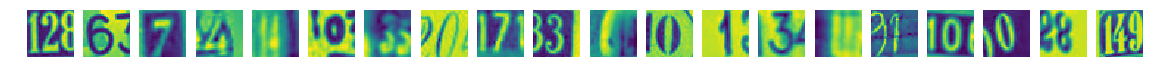

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]


In [18]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i].reshape(32, 32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:20]))

# Prediction using standard KNN algorithm

In [86]:

from sklearn.neighbors import KNeighborsClassifier

clfKNN = KNeighborsClassifier(n_neighbors = 1)
clfKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [87]:
clfKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [88]:
y_train_predict = clfKNN.predict(X_train)
accuracy_score(y_train,y_train_predict)


1.0

In [89]:
y_val_predict = clfKNN.predict(X_val)
accuracy_score(y_val,y_val_predict)

0.83775

In [90]:
y_test_predict = clfKNN.predict(X_test)
accuracy_score(y_test,y_test_predict)

0.45916666666666667

In [91]:
print(classification_report(y_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49      1973
           1       0.57      0.50      0.53      2072
           2       0.48      0.54      0.51      1626
           3       0.35      0.37      0.36      1635
           4       0.57      0.60      0.59      1739
           5       0.33      0.38      0.36      1538
           6       0.39      0.38      0.39      1855
           7       0.59      0.63      0.61      1703
           8       0.37      0.34      0.36      1983
           9       0.40      0.39      0.40      1876

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000



- The accuracy with the traditional KNN model is 45.9% which is way below than the training and validation accuracy 
- The model is trying to overfit and it doesnot perform well on the training set

# Neural Network from scratch

#### Defining the Fully Connected Layer

In [41]:
import numpy as np 

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.b
        return output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

#### Defining the Rectified Linear Activation Layer


In [42]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

#### Defining the softmax function

In [43]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [44]:
#### Defining the Cross Entropy Loss

In [45]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

### Neural Network Class

In [46]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)  + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.loss_func.backward(out,y) + ((Lambda/y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []


In [47]:
#### Defining the update function (SGD)

In [48]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

#### Defining a function which gives us the minibatches (both the datapoint and the corresponding label)

In [49]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]

        minibatches.append((X_batch, y_batch))
    return minibatches

In [50]:
#### The traning loop

In [64]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net, val_acc

In [65]:
#### Checking the accuracy of the model 

In [66]:
def check_accuracy(y_true, y_pred):
    count = 0
    for i,j in zip(y_true, y_pred):
        if int(i)==j:
            count +=1
    return float(count)/float(len(y_true))

In [67]:
#### Invoking all that we have created until now

In [68]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 1000
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(hidden_nodes, output_nodes))
    
    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=200, epoch=iterations, learning_rate=0.01,
                      X_val=X_val, y_val=y_val, Lambda = Lambda)
    return val_acc

In [70]:
lr = 0.01
Lambda = 0
train_and_test_loop(200, lr, Lambda)

Loss = 2.2988383042308995 | Training Accuracy = 0.13842857142857143 | Val Loss = 2.288715935514883 | Val Accuracy = 0.13801666666666668
Loss = 0.5067567033241465 | Training Accuracy = 0.8506190476190476 | Val Loss = 0.5535381057178587 | Val Accuracy = 0.8419333333333333
Loss = 0.37085111470344556 | Training Accuracy = 0.8827619047619047 | Val Loss = 0.455005968408954 | Val Accuracy = 0.8685166666666667
Loss = 0.2856935633208553 | Training Accuracy = 0.8956666666666667 | Val Loss = 0.4227121177769782 | Val Accuracy = 0.8779166666666667


0.88435

In [72]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 1000
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(hidden_nodes, output_nodes))
    
    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=200, epoch=iterations, learning_rate=0.01,
                      X_val=X_test,y_val=y_test, Lambda = Lambda)
    return val_acc

In [73]:
lr = 0.01
Lambda = 0
train_and_test_loop(200, lr, Lambda)

Loss = 2.2987238195045077 | Training Accuracy = 0.1752857142857143 | Val Loss = 2.287327505111902 | Val Accuracy = 0.1676111111111111
Loss = 0.5133765689436457 | Training Accuracy = 0.8347619047619048 | Val Loss = 0.6563289589216994 | Val Accuracy = 0.8033333333333333
Loss = 0.36827052068677946 | Training Accuracy = 0.8627619047619047 | Val Loss = 0.559236791172203 | Val Accuracy = 0.8214444444444444
Loss = 0.2848801207408324 | Training Accuracy = 0.8901666666666667 | Val Loss = 0.49581627131120143 | Val Accuracy = 0.8332777777777778


0.8397777777777777

# NEAURAL NETWORKS USING KERAS

### Framework to check different models 

In [74]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
y_val1 = to_categorical(y_val)

# n_fet : Number of features 

# layer : Number of Layers ( last layer being output layer) list should contain number of neurons in each layer
[256,150,30,1]
# initializers : Weight Initializers
       # Options: zeros, ones, RandomNormal, he_normal,RandomUniform, TruncatedNormal, glorot_normal ... etc
    
# activations : Activation function for each layer 
       # Options: sigmoid, relu, elu, selu, softmax ...etc
    
# dropout : Do we need dropout layer [ Specified as percentage ; 0.0 means no dropout]

# batchNormalization : Do we need batch Normalization

# optimizer : Optimizer 
       # Options : SGD, Adam, RMSprop, Adagrad
    
# lr : Learning rate

# loss : loss function 
       # Options : categorical_crossentropy, binary_crossentropy, 
    
# metric : evaluation measure 
       # Options : accuracy, mae, auc 
    
# Regularizer: Regularization (L1,L2 or L1 L2)
    
def create_model(n_fet,layers,initializers,activations,dropout,batchNormalization,optimizer,lr,loss,metric,regularizer):
    model = Sequential()
    for i in range(len(layers)):
        if(i==0):
            if regularizer:
                model.add(Dense(layers[i], input_shape = (n_fet, ),kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers[i]))
            else:
                model.add(Dense(layers[i], input_shape = (n_fet, ), kernel_initializer=initializers[i]))
            model.add(Activation(activations[i]))
            if dropout[i] != 0.0:
                model.add(Dropout(dropout[i]))
            if batchNormalization :
                model.add(BatchNormalization())
        else:
            if regularizer:
                model.add(Dense(layers[i], kernel_initializer=initializers[i]))
            else:
                model.add(Dense(layers[i],kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers[i]))
            model.add(Activation(activations[i]))
            if dropout[i] != 0.0:
                model.add(Dropout(dropout[i]))
            if batchNormalization:
                model.add(BatchNormalization())
            
    if optimizer=='Adam' :
        opt = Adam(lr=lr)
    elif optimizer == "Adagrad":
        opt = Adagrad(lr=lr)
    elif optimizer == "Adamax" :
        opt = Adamax(lr=lr)
    elif optimizer == "SGD":
        opt = SGD(lr=lr)
    elif optimizer == "RMSprop":
        opt = RMSprop(lr=lr)
    elif optimizer == "Nadam":
        opt = Nadam(lr=lr)


    model.compile(optimizer = opt, loss = loss, metrics = metric)

    return model
                

### First Model

In [80]:
model1 = create_model(1024,[200,150,100,50,10],['he_normal','he_normal','he_normal','he_normal','he_normal'],['relu','relu','relu','relu','softmax'],[0.0,0.0,0.0,0.0,0.0],1,'Adam',0.001,'binary_crossentropy',['accuracy'],1)

In [81]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               205000    
_________________________________________________________________
activation_6 (Activation)    (None, 200)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_7 (Dense)              (None, 150)               30150     
_________________________________________________________________
activation_7 (Activation)    (None, 150)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 150)               600       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15100     
__________

In [82]:
history1 = model1.fit(X_train, y_train1, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 54s 1ms/step - loss: 3.9385 - acc: 0.4048
Epoch 2/10
42000/42000 [==============================] - 56s 1ms/step - loss: 1.6370 - acc: 0.5350
Epoch 3/10
42000/42000 [==============================] - 52s 1ms/step - loss: 1.2299 - acc: 0.6690
Epoch 4/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.9878 - acc: 0.8283
Epoch 5/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.6852 - acc: 0.8773: 0s - loss: 0.6854 - acc: 0.8
Epoch 6/10
42000/42000 [==============================] - 53s 1ms/step - loss: 0.5901 - acc: 0.8921
Epoch 7/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.6552 - acc: 0.9000
Epoch 8/10
42000/42000 [==============================] - 50s 1ms/step - loss: 0.5410 - acc: 0.9000
Epoch 9/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.4505 - acc: 0.9000
Epoch 10/10
42000/42000 [==============================] - 46s 1ms/ste

In [83]:
model1.evaluate(X_val, y_val1)[1]

60000/60000 [==============================] - 7s 121us/step


0.893880042330424

In [84]:
model1.evaluate(X_test,y_test1)[1]

18000/18000 [==============================] - 2s 109us/step


0.8934500444200304

### Second Model

In [85]:
model2 = create_model(1024,[200,200,100,100,10],['RandomNormal','RandomNormal','he_normal','he_normal','he_normal'],['relu','relu','relu','relu','softmax'],[0.0,0.0,0.0,0.0,0.0],1,'Adam',0.001,'binary_crossentropy',['accuracy'],1)

In [86]:
history2 = model2.fit(X_train, y_train1, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 87s 2ms/step - loss: 5.0849 - acc: 0.5545
Epoch 2/10
42000/42000 [==============================] - 68s 2ms/step - loss: 2.2217 - acc: 0.7626: 1s 
Epoch 3/10
42000/42000 [==============================] - 71s 2ms/step - loss: 1.2291 - acc: 0.7975
Epoch 4/10
42000/42000 [==============================] - 67s 2ms/step - loss: 0.9226 - acc: 0.8083: 8s - loss: 0.9237 - acc - ETA: 7s - loss: 0.9235 -  - ETA: 0s - loss: 0.9226 - acc: 0
Epoch 5/10
42000/42000 [==============================] - 68s 2ms/step - loss: 0.7671 - acc: 0.8106TA: 1
Epoch 6/10
42000/42000 [==============================] - 68s 2ms/step - loss: 0.7539 - acc: 0.8268
Epoch 7/10
42000/42000 [==============================] - 70s 2ms/step - loss: 0.7536 - acc: 0.8939
Epoch 8/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.7507 - acc: 0.9000
Epoch 9/10
42000/42000 [==============================] - ETA: 0s - loss: 0.7095 - acc: 0.900 - 68s 2ms

In [87]:
model2.evaluate(X_val, y_val1)[1]

60000/60000 [==============================] - 10s 165us/step


0.9000000357627869

In [88]:
model2.evaluate(X_test,y_test1)[1]

18000/18000 [==============================] - 3s 144us/step


0.9000000357098049

# Callbacks

In [156]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.callbacks import TensorBoard

### Reducing Learning Rate

In [157]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=30, min_lr=0.000001, verbose=1)

### Model Check Pointer

In [158]:
checkpointer = ModelCheckpoint(filepath="GoogleStreet.hdf5", verbose=1, save_best_only=True)

### Tensor Board Visualization

In [159]:
tensorboard = TensorBoard(log_dir='logs', histogram_freq=2,write_graph=True, write_images=False)

In [160]:
model2.fit(X_train, y_train1, batch_size = 200, epochs = 10, verbose = 1,validation_split=0.20,
          callbacks=[reduce_lr, checkpointer],shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 186us/step - loss: 0.6740 - acc: 0.8997 - val_loss: 0.6761 - val_acc: 0.8998

Epoch 00001: val_loss improved from inf to 0.67607, saving model to GoogleStreet.hdf5
Epoch 2/10
33600/33600 [==============================] - 6s 192us/step - loss: 0.6520 - acc: 0.8999 - val_loss: 0.6630 - val_acc: 0.9000

Epoch 00002: val_loss improved from 0.67607 to 0.66301, saving model to GoogleStreet.hdf5
Epoch 3/10
33600/33600 [==============================] - 6s 192us/step - loss: 0.6400 - acc: 0.9000 - val_loss: 0.6522 - val_acc: 0.8999

Epoch 00003: val_loss improved from 0.66301 to 0.65216, saving model to GoogleStreet.hdf5
Epoch 4/10
33600/33600 [==============================] - 6s 191us/step - loss: 0.6303 - acc: 0.9000 - val_loss: 0.6433 - val_acc: 0.9000

Epoch 00004: val_loss improved from 0.65216 to 0.64330, saving model to GoogleStreet.hdf5
Epoch 5/10
33600/33600 [===============

# Creating Ensemble of Models

### Ensemble Without Dropout

In [110]:
def nn_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
   # model.add(Dropout(0.1))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
   # model.add(Dropout(0.1))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [111]:
# create 5 models to ensemble
model111 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model122 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model133 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model144 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model155 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)

In [112]:
ensemble_clf1 = VotingClassifier(estimators = [('model111', model111), ('model122', model122), ('model133', model133), ('model144', model144), ('model155', model155)], voting = 'soft')

In [113]:
ensemble_clf1.fit(X_train, y_train)

VotingClassifier(estimators=[('model111', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF0321F550>), ('model122', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF0321F630>), ('model133', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF0321F710>), ('model144', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF0321F748>), ('model155', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF0321F588>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [114]:
y_pred1 = ensemble_clf1.predict(X_train)

In [115]:
print('Training Accuracy: ',accuracy_score(y_pred1 , y_train))

Training Accuracy:  0.9907857142857143


In [116]:
y_pred_validation = ensemble_clf1.predict(X_val)

In [117]:
print('Validation Accuracy: ', accuracy_score(y_pred_validation, y_val))

Validation Accuracy:  0.9584166666666667


In [118]:
y_pred_testing = ensemble_clf1.predict(X_test)

In [119]:
print('Testing Accuracy: ', accuracy_score(y_pred_testing, y_test))

Testing Accuracy:  0.8828888888888888


In [120]:
print('Classification Report:\n', classification_report(y_pred_testing,y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1867
           1       0.89      0.87      0.88      1868
           2       0.90      0.91      0.90      1791
           3       0.83      0.88      0.86      1623
           4       0.92      0.91      0.91      1823
           5       0.87      0.87      0.87      1760
           6       0.84      0.90      0.87      1709
           7       0.90      0.93      0.91      1760
           8       0.87      0.85      0.86      1839
           9       0.90      0.83      0.86      1960

   micro avg       0.88      0.88      0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



In [121]:
print('Confusion Matrix:\n', confusion_matrix(y_pred_testing, y_test))

Confusion Matrix:
 [[1657   26   12   17   20   12   39   16   24   44]
 [  29 1627   23   24   35   14   18   47   33   18]
 [  17   17 1622   34   11   13   11   36   17   13]
 [   9   22   21 1433   15   51   14   15   27   16]
 [  12   47   13   17 1658    8   33   15    8   12]
 [   2   10   11   85    5 1534   55    6   21   31]
 [  15   14    3   21   13   48 1543    5   40    7]
 [  11   30   33   19    4    6    8 1628    6   15]
 [  12   17   19   37   15   40   92   11 1569   27]
 [  50   18   46   32   36   42   19   29   67 1621]]


### Ensemble with Dropout

In [89]:
def nn_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.1))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [162]:
# create 5 models to ensemble
model1111 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model1222 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model1333 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model1444 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)
model1555 = KerasClassifier(build_fn = nn_model, epochs = 200, verbose = 0)

In [163]:
ensemble_clf2 = VotingClassifier(estimators = [('model1111', model1111), ('model1222', model1222), ('model1333', model1333), ('model1444', model1444), ('model1555', model1555)], voting = 'soft')

In [164]:
ensemble_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('model1111', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF323E4630>), ('model1222', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF323E44A8>), ('model1333', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF323E4EF0>), ('model1444', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF323E4898>), ('model1555', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF323E4748>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [165]:
y_pred2 = ensemble_clf2.predict(X_train)

In [166]:
print('Training Accuracy: ',accuracy_score(y_pred2 , y_train))

Training Accuracy:  0.9921666666666666


In [167]:
y_pred2_validation = ensemble_clf2.predict(X_val)

In [168]:
print('Validation Accuracy: ',accuracy_score(y_pred2_validation , y_val))

Validation Accuracy:  0.9596


In [169]:
y_pred2_testing = ensemble_clf2.predict(X_test)

In [170]:
print('Testing Accuracy: ',accuracy_score(y_pred2_testing , y_test))

Testing Accuracy:  0.8836111111111111


In [171]:
print('Classification Report:\n', classification_report(y_pred2_testing,y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1842
           1       0.90      0.87      0.88      1878
           2       0.88      0.93      0.90      1706
           3       0.87      0.80      0.83      1866
           4       0.92      0.90      0.91      1838
           5       0.89      0.85      0.87      1845
           6       0.86      0.90      0.88      1766
           7       0.92      0.90      0.91      1841
           8       0.84      0.90      0.87      1691
           9       0.85      0.89      0.87      1727

   micro avg       0.88      0.88      0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



In [172]:
print('Confusion Matrix:\n', confusion_matrix(y_pred2_testing, y_test))

Confusion Matrix:
 [[1654   17    9   10   16    9   34   14   30   49]
 [  29 1638   26   24   39   12   18   42   28   22]
 [   6   12 1586   18   12    9    5   24   16   18]
 [  17   38   51 1493   24   78   25   25   72   43]
 [  23   40   20   12 1658    9   29   13   14   20]
 [   9   15   11   87    8 1569   68    5   29   44]
 [  25   16    4   14   14   39 1584    8   49   13]
 [  17   34   52   23    8    4   10 1660   11   22]
 [  11   11   13   19    8   20   48    7 1522   32]
 [  23    7   31   19   25   19   11   10   41 1541]]


# CONCLUSIONS





- SVHN dataset was modelled by traditional KNN classifier.  The model algorithm has highest accuracy of 100% with training, 
  85% with validation set but the accuracy drops to 45% with the test set.  Its a clear indication of overfitting
  
  

- The Classification report with KNN classifier is generated.



- Programming of Neural Networks done from scratch without using batch normalization and drop out.  1000 hidden nodes used   in single layer to obtain the accuracy of 89.5 in training set, 87.7 in validation and 83.9 in testing phase



- A framework to generate different models with KERAS is programmed and two different models are checked by including batch normalization, with different number of nodes in hidden layers.  Both models gave approximately 90% accuracy in all the three datasets



- Ensemble of five different models with same number of nodes and epocs generated with and without dropout along with batch normalization.  Both the models gave accuracies of 99% in training set, 95.7 in validation and 88.3 in testing phase.  The classification report and confusion matrix are generated.  




- The accuracy on the validation and test data imporved from 85.3 to 95.7% and 45.7 to 88.3 respectively from the traditional KNN classifier to Ensemble of Neural Network models.




- Callbacks like 'reducing Learning Rate' and 'ModelCheckPointer' are implemented on a Neural network model.